In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import json 
from scipy import stats
from scipy.stats import linregress
from config import weather_api_key
#from config import g_key
from citipy import citipy
csvfile = "Buoy Stations - Sheet1.csv" 

In [12]:
#check length of cities
# len(list(df_city["City"].unique()))

In [6]:
#Identify the weather conditions in Bouy 
buoy_df2 = pd.read_csv("CSV_Output/buoy_data.csv")

buoy_df2["Storm_Category_Wind"] = ["NA" if x <=40 else "TS" if x <=55 else "LS" if x <=70 else "HU" for x in buoy_df2["Wind_Speed"]]
buoy_df2["Storm_Category_Pressure"] = ["NA" if x >=1008 else "TS" if x >=990 else "LS" if x >=950 else "HU" for x in buoy_df2["Pressure"]]
buoy_df2

,Lat,Long,Temp,Pressure,Wind_Speed,Wind_Degrees,Unix Time,Storm_Category_Wind,Storm_Category_Pressure
0,26.055,-93.646,85.14,1012,7.16,56,1630972800,NA,NA
1,26.055,-93.646,84.94,1012,8.30,70,1630976400,NA,NA
2,26.055,-93.646,84.99,1012,9.55,89,1630980000,NA,NA
3,26.055,-93.646,84.88,1013,10.42,100,1630983600,NA,NA
4,26.055,-93.646,84.76,1013,10.76,111,1630987200,NA,NA
...,...,...,...,...,...,...,...,...,...
4546,21.030,-64.790,83.68,1015,13.94,88,1630695600,NA,NA
4547,21.030,-64.790,83.77,1015,14.29,86,1630699200,NA,NA
4548,21.030,-64.790,83.66,1015,14.23,86,1630702800,NA,NA
4549,21.030,-64.790,83.46,1015,14.81,88,1630706400,NA,NA


In [7]:
#Identify the weather conditions in Houston region

city_df2 = pd.read_csv("CSV_Output/city_data.csv")
city_df2["Storm_Category_Wind"] = ["NA" if x <=40 else "TS" if x <=55 else "LS" if x <=70 else "HU" for x in city_df2["Wind_Speed"]]
city_df2["Storm_Category_Pressure"] = ["NA" if x >=1008 else "TS" if x >=990 else "LS" if x >=950 else "HU" for x in city_df2["Pressure"]]
city_df2

,City Name,Temperature,Pressure,Wind Degrees,Wind_Speed,Storm_Category_Wind,Storm_Category_Pressure
0,Brownwood,86.25,1014,170,16.11,NA,NA
1,Brownwood,80.71,1015,180,8.05,NA,NA
2,Brownwood,77.34,1015,140,4.61,NA,NA
3,Brownwood,75.79,1016,0,0.00,NA,NA
4,Brownwood,74.26,1016,0,0.00,NA,NA
...,...,...,...,...,...,...,...
10651,South Houston,88.39,1014,0,0.00,NA,NA
10652,South Houston,82.00,1014,70,12.66,NA,NA
10653,South Houston,81.00,1015,170,11.50,NA,NA
10654,South Houston,79.66,1013,170,5.75,NA,NA


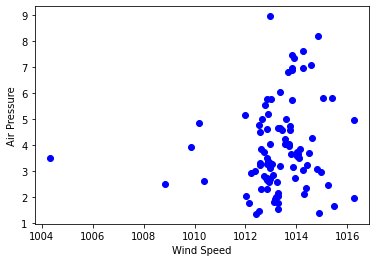

In [8]:

x_values = city_df2.groupby("City Name").mean()["Pressure"]
y_values = city_df2.groupby("City Name").mean()["Wind_Speed"]

plt.scatter(x_values,y_values,color="blue")
plt.ylabel('Air Pressure')
plt.xlabel('Wind Speed')

plt.show()